In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('dataset/train.csv')
test_data = pd.read_csv('dataset/test.csv')
submission_file = pd.read_csv('dataset/sample_submission.csv')

In [3]:
print("Shape of train_data is", train_data.shape)
print("Shape of test_data is", test_data.shape)

Shape of train_data is (2249698, 6)
Shape of test_data is (734736, 5)


In [4]:
for col in train_data.columns:
    print("For column :", col, "dtype is: ", train_data[col].dtype)
    print(len(train_data[col].value_counts()))

For column : PRODUCT_ID dtype is:  int64
2249698
For column : TITLE dtype is:  object
2210762
For column : BULLET_POINTS dtype is:  object
965330
For column : DESCRIPTION dtype is:  object
745275
For column : PRODUCT_TYPE_ID dtype is:  int64
12907
For column : PRODUCT_LENGTH dtype is:  float64
16655


In [5]:
for col in test_data.columns:
    print("For column :", col, "dtype is: ", test_data[col].dtype)
    print(len(test_data[col].value_counts()))

For column : PRODUCT_ID dtype is:  int64
734736
For column : TITLE dtype is:  object
728835
For column : BULLET_POINTS dtype is:  object
355169
For column : DESCRIPTION dtype is:  object
274848
For column : PRODUCT_TYPE_ID dtype is:  int64
10565


In [6]:
train_data.head()

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
0,1925202,ArtzFolio Tulip Flowers Blackout Curtain for D...,[LUXURIOUS & APPEALING: Beautiful custom-made ...,NaN,1650,2125.980000
1,2673191,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,"[Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...",NaN,2755,393.700000
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537,748.031495
3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,2996,787.401574
4,283658,The United Empire Loyalists: A Chronicle of th...,NaN,NaN,6112,598.424000


In [7]:
test_data.head()

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID
0,604373,Manuel d'Héliogravure Et de Photogravure En Re...,NaN,NaN,6142
1,1729783,DCGARING Microfiber Throw Blanket Warm Fuzzy P...,[QUALITY GUARANTEED: Luxury cozy plush polyest...,<b>DCGARING Throw Blanket</b><br><br> <b>Size ...,1622
2,1871949,I-Match Auto Parts Front License Plate Bracket...,"[Front License Plate Bracket Made Of Plastic,D...",Replacement for The Following Vehicles:2020 LE...,7540
3,1107571,PinMart Gold Plated Excellence in Service 1 Ye...,[Available as a single item or bulk packed. Se...,Our Excellence in Service Lapel Pins feature a...,12442
4,624253,"Visual Mathematics, Illustrated by the TI-92 a...",NaN,NaN,6318


In [8]:
# Calculate the median of column 'A'
median_A = train_data['PRODUCT_LENGTH'].median()

# Print the median of column 'A'
print("Median of column 'PRODUCT_LENGTH':", median_A)


Median of column 'PRODUCT_LENGTH': 663.0


In [9]:
# Calculate the median of column 'A'
mode_A = train_data['PRODUCT_LENGTH'].mode()

# Print the median of column 'A'
print("Median of column 'PRODUCT_LENGTH':", mode_A)


Median of column 'PRODUCT_LENGTH': 0    600.0
Name: PRODUCT_LENGTH, dtype: float64


In [10]:
for col in train_data.columns:
    print("For column:", col, "NAN =", train_data[col].isna().sum())

For column: PRODUCT_ID NAN = 0
For column: TITLE NAN = 12
For column: BULLET_POINTS NAN = 837364
For column: DESCRIPTION NAN = 1157381
For column: PRODUCT_TYPE_ID NAN = 0
For column: PRODUCT_LENGTH NAN = 0


In [11]:
for col in test_data.columns:
    print("For column:", col, "NAN =", test_data[col].isna().sum())

For column: PRODUCT_ID NAN = 0
For column: TITLE NAN = 5
For column: BULLET_POINTS NAN = 275922
For column: DESCRIPTION NAN = 380001
For column: PRODUCT_TYPE_ID NAN = 0


<Axes: xlabel='PRODUCT_TYPE_ID', ylabel='PRODUCT_LENGTH'>

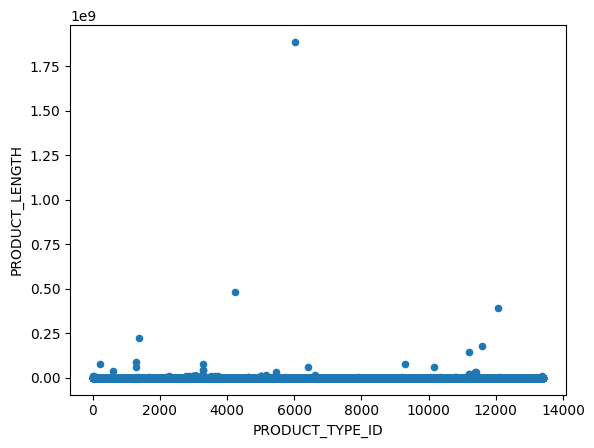

In [12]:
train_data.plot(x='PRODUCT_TYPE_ID', y='PRODUCT_LENGTH', kind = 'scatter')

In [13]:
counts = train_data['PRODUCT_LENGTH'].value_counts().sort_values(ascending=False)[:8]


In [14]:
print(counts)

600.000000     132095
590.551180      80428
500.000000      62388
393.700787      58178
850.000000      45034
                ...  
1039.000000        71
957.000000         71
877.952755         71
507.000000         71
8.000000           71
Name: PRODUCT_LENGTH, Length: 1653, dtype: int64


In [15]:
df = train_data['PRODUCT_TYPE_ID']

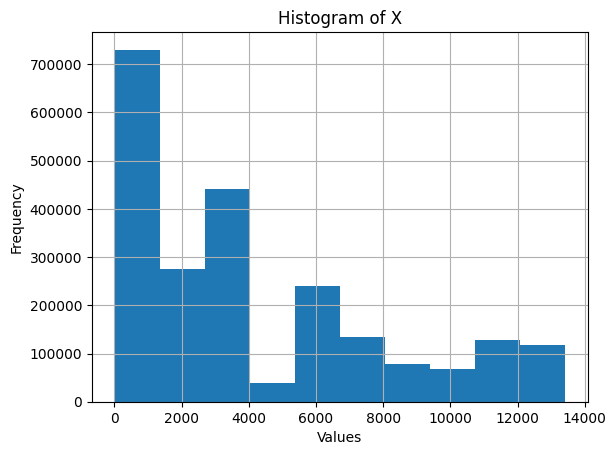

In [16]:
# customize plot
df.hist()
plt.title('Histogram of X')
plt.xlabel('Values')
plt.ylabel('Frequency')

# show plot
plt.show()

In [17]:
label = train_data['PRODUCT_LENGTH'].clip(upper=5000)

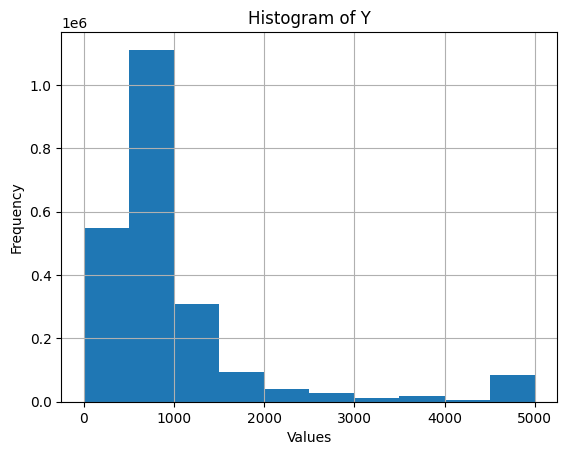

In [18]:
label.hist()

# customize plot
plt.title('Histogram of Y')
plt.xlabel('Values')
plt.ylabel('Frequency')

# show plot
plt.show()

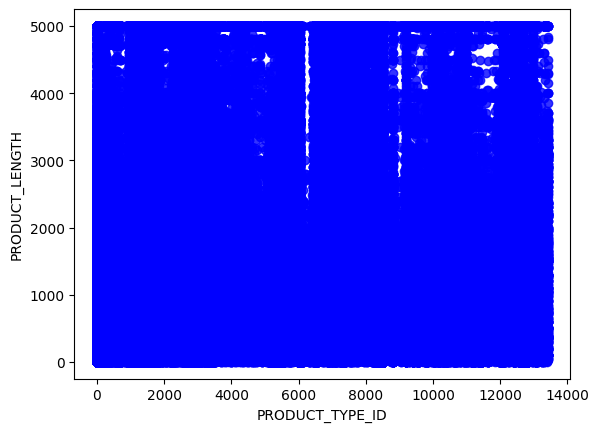

In [19]:
# Create scatter plot with regression line
sns.regplot(x=df, y=label, color='b')

# Show plot
plt.show()

In [20]:
preds = np.ones((len(submission_file))) * median_A
submission_file['PRODUCT_LENGTH'] = preds
submission_file.to_csv('submission_files/all_median.csv', index = False)

In [21]:
mode_A = float(mode_A)
preds = np.ones((len(submission_file))) * mode_A
submission_file['PRODUCT_LENGTH'] = preds
submission_file.to_csv('submission_files/all_mode.csv', index = False)

In [27]:
title_length = train_data['TITLE'].apply(lambda x: len(x.split()) if isinstance(x, str) else 10)
print(f"Maximum sentence length: {title_length.max()}")
print(f"Minimum sentence length: {title_length.min()}")

Maximum sentence length: 103
Minimum sentence length: 1


In [31]:
bullet_length = train_data['BULLET_POINTS'].apply(lambda x: len(x.split()) if isinstance(x, str) else 10)
print(f"Maximum sentence length: {bullet_length.max()}")
print(f"Minimum sentence length: {bullet_length.min()}")

Maximum sentence length: 811
Minimum sentence length: 1


In [32]:
description_length = train_data['DESCRIPTION'].apply(lambda x: len(x.split()) if isinstance(x, str) else 10)
print(f"Maximum sentence length: {description_length.max()}")
print(f"Minimum sentence length: {description_length.min()}")

Maximum sentence length: 552
Minimum sentence length: 1


In [26]:
train_data.head()

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
0,1925202,ArtzFolio Tulip Flowers Blackout Curtain for D...,[LUXURIOUS & APPEALING: Beautiful custom-made ...,NaN,1650,2125.980000
1,2673191,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,"[Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...",NaN,2755,393.700000
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537,748.031495
3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,2996,787.401574
4,283658,The United Empire Loyalists: A Chronicle of th...,NaN,NaN,6112,598.424000
